In [22]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint

In [23]:
cd /home/pipi/newyr/g4e/g4e-dev/examples

/home/pipi/newyr/g4e/g4e-dev/examples


In [24]:
ls

add_subdetector.py          g4e_output.root
beagle.mac                  g4e_simulation.py
blah                        hello_world_g4e.py
blehhh.pdf                  herwig.mac
build_g4e.py                my_root_instead_of_simple_run.bgn.rndm
check_overlaps.py           my_root_instead_of_simple_run.end.rndm
cone_particle_gun.bgn.rndm  my_root_instead_of_simple_run.geo.gdml
cone_particle_gun.end.rndm  my_root_instead_of_simple_run.geo.root
cone_particle_gun.geo.gdml  my_root_instead_of_simple_run.root
cone_particle_gun.geo.root  my_root_instead_of_simple_run.run.json
cone_particle_gun.mac       my_root_instead_of_simple_run.run.mac
cone_particle_gun.py        pythia.mac
cone_particle_gun.root      simple_run_jleic.py
cone_particle_gun.run.json  simple_run.py
cone_particle_gun.run.mac   test_run.bgn.rndm
cone_particle_gun_vis.py    test_run.end.rndm
event_display.bgn.rndm      test_run.geo.gdml
event_display.geo.gdml      test_run.geo.root
event_display.geo.root      test_run.root
event

In [25]:
file=uproot4.open("my_root_instead_of_simple_run.root")

# To see all object names in the file:
file.items()

# only names: file.keys(), file.values()))

# To see items in subdirectories
# file.keys(recursive=True)

# There are more functions related to file:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html

# Root directories:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html

# To read multiple files at once (aka TChain)
# https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-many-files

[('events;5', <TTree 'events' (65 branches) at 0x7fb0596cea30>),
 ('events;4', <TTree 'events' (65 branches) at 0x7fb0f1046250>)]

In [26]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

#Uncomment this to see all values:
tree.show()


# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html

Number of entries: 489
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event_id             | uint64_t                 | AsDtype('>u8')
evt_true_q2          | double                   | AsDtype('>f8')
evt_true_x           | double                   | AsDtype('>f8')
evt_true_y           | double                   | AsDtype('>f8')
evt_true_w2          | double                   | AsDtype('>f8')
evt_true_nu          | double                   | AsDtype('>f8')
evt_true_t_hat       | double                   | AsDtype('>f8')
evt_has_dis_info     | int8_t                   | AsDtype('int8')
evt_weight           | double                   | AsDtype('>f8')
hit_count            | uint64_t                 | AsDtype('>u8')
hit_id               | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_trk_id           | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hi

In [27]:
# To load WHOLE data from a branch as an array:
hit_id = tree['hit_id'].array()
hit_x = tree['hit_x'].array()
hit_y = tree['hit_y'].array()




# library=np to return/convert array as a numpy library.

# print(hit_xyz)
# print(f"There are total: {len(hit_xyz['hit_x'])} hits records")

# 261
# [[...],[...], .... ]
#counting
'''for i in hit_vol:
    for j in i:
        if j[0]=='c':
            print(j)'''
    


"for i in hit_vol:\n    for j in i:\n        if j[0]=='c':\n            print(j)"

In [28]:
hit_z = tree['hit_z'].array()
hit_vol = tree['hit_vol_name'].array()

In [8]:
for i in hit_vol:
    for j in i:
        if j[:len('ffi_ZDC')]=='ffi_ZDC':
            print(j)

ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys
ffi_ZDC_GVol_Phys


In [29]:

#for i in tree["hit_vol_name"].array():
    #print(i)
print(ak.num(hit_id))
print(ak.num(hit_z))
print(ak.num(hit_vol))

[7043, 3425, 8716, 5627, 7333, 7507, 7208, ... 6788, 7885, 8368, 5358, 5248, 3668]
[7043, 3425, 8716, 5627, 7333, 7507, 7208, ... 6788, 7885, 8368, 5358, 5248, 3668]
[7043, 3425, 8716, 5627, 7333, 7507, 7208, ... 6788, 7885, 8368, 5358, 5248, 3668]


In [30]:
hit_zcb=hit_z.mask[hit_vol=='cb_EMCAL_GVol_Phys']
hit_xcb=hit_x.mask[hit_vol=='cb_EMCAL_GVol_Phys']
hit_ycb=hit_y.mask[hit_vol=='cb_EMCAL_GVol_Phys']


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb0f0eb1bb0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb0f0eb1fa0>)

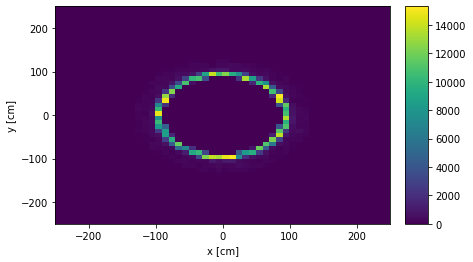

In [31]:
h_cb = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
)

h_cb.fill(ak.to_numpy(ak.flatten(hit_xcb/10)),
       ak.to_numpy(ak.flatten(hit_ycb/10)))
h_cb.plot()

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7fb0596356d0>, errorbar=None, legend_artist=None)]

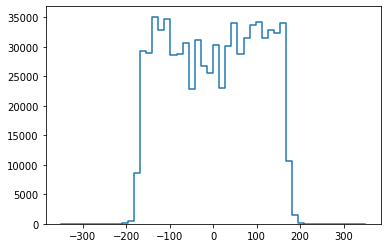

In [32]:
z_cb= Hist(
    hist.axis.Regular(50, -350, 350, name="X", label="x [cm]", flow=False),)
z_cb.fill(ak.to_numpy(ak.flatten(hit_zcb/10)))
z_cb.plot()

In [33]:
hit_z_zdc=hit_z.mask[hit_vol[:,:,:len('ci_EMCAL')]=='ci_EMCAL']
hit_x_zdc=hit_x.mask[hit_vol[:,:,:len('ci_EMCAL')]=='ci_EMCAL']
hit_y_zdc=hit_y.mask[hit_vol[:,:,:len('ci_EMCAL')]=='ci_EMCAL']

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7fb059467340>, errorbar=None, legend_artist=None)]

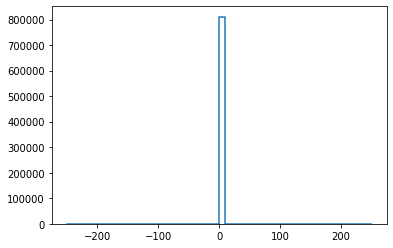

In [34]:
z= Hist(
    hist.axis.Regular(50, -5000, 5000, name="X", label="x [cm]", flow=False),)
z.fill(ak.to_numpy(ak.flatten(hit_z_zdc/10)))
z.plot()


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb059578d30>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb0f0f2c0d0>)

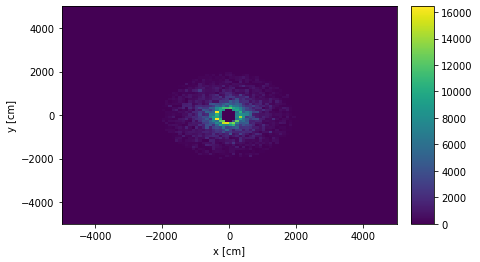

In [35]:
h = Hist(
    hist.axis.Regular(100, -5000, 5000, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(100, -5000, 5000, name="Y", label="y [cm]", flow=False),
)

h.fill(ak.to_numpy(ak.flatten(hit_x_zdc/1)),
       ak.to_numpy(ak.flatten(hit_y_zdc/1)))
h.plot()

In [75]:
hit_z_zdc_trk=hit_z.mask[hit_vol[:,:,:len('ffi_ZDC_GVol_Phys')]=='ffi_ZDC_GVol_Phys']
hit_x_zdc_trk=hit_x.mask[hit_vol[:,:,:len('ffi_ZDC_GVol_Phys')]=='ffi_ZDC_GVol_Phys']
hit_y_zdc_trk=hit_y.mask[hit_vol[:,:,:len('ffi_ZDC_GVol_Phys')]=='ffi_ZDC_GVol_Phys']

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7fb0f01a3fa0>, errorbar=None, legend_artist=None)]

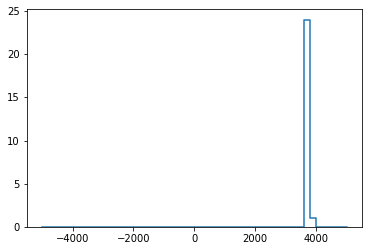

In [76]:
z_trk= Hist(
    hist.axis.Regular(50, -5000, 5000, name="X", label="x [cm]", flow=False),)
z_trk.fill(ak.to_numpy(ak.flatten(hit_z_zdc_trk/10)))
z_trk.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb0a5ccf1f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb0a5ccf5e0>)

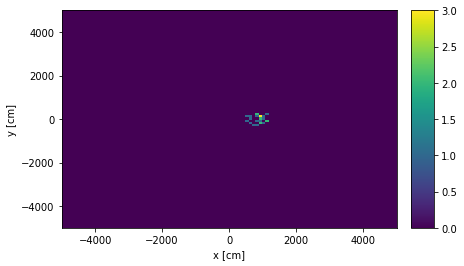

In [78]:
h_trk = Hist(
    hist.axis.Regular(100, -5000, 5000, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(100, -5000, 5000, name="Y", label="y [cm]", flow=False),
)

h_trk.fill(ak.to_numpy(ak.flatten(hit_x_zdc_trk/1)),
       ak.to_numpy(ak.flatten(hit_y_zdc_trk/1)))
h_trk.plot()

In [81]:
hit_z_offm_trk=hit_z.mask[hit_vol[:,:,:len('ffi__OFFM_TRK')]=='ffi__OFFM_TRK']
hit_x_offm_trk=hit_x.mask[hit_vol[:,:,:len('ffi__OFFM_TRK')]=='ffi__OFFM_TRK']
hit_y_offm_trk=hit_y.mask[hit_vol[:,:,:len('ffi__OFFM_TRK')]=='ffi__OFFM_TRK']

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7fb0a5bc7d90>, errorbar=None, legend_artist=None)]

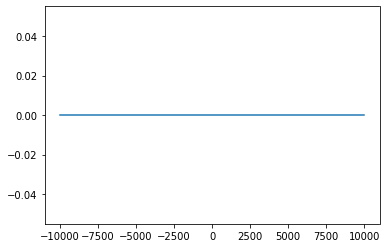

In [82]:
z_OFFM= Hist(
    hist.axis.Regular(50, -10000, 10000, name="X", label="x [cm]", flow=False),)
z_OFFM.fill(ak.to_numpy(ak.flatten(hit_z_offm_trk/10)))
z_OFFM.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb0a5ba9430>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb0a5ba9820>)

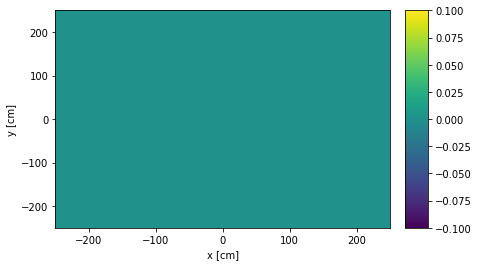

In [83]:
h_offm = Hist(
    hist.axis.Regular(100, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(100, -250, 250, name="Y", label="y [cm]", flow=False),
)

h_offm.fill(ak.to_numpy(ak.flatten(hit_x_offm_trk/1)),
       ak.to_numpy(ak.flatten(hit_y_offm_trk/1)))
h_offm.plot()

In [63]:
hit_z_offm2_trk=hit_z.mask[hit_vol[:,:,:len('ffi_OFFM_TRK2')]=='ffi_OFFM_TRK2']
hit_x_offm2_trk=hit_x.mask[hit_vol[:,:,:len('ffi_OFFM_TRK2')]=='ffi_OFFM_TRK2']
hit_y_offm2_trk=hit_y.mask[hit_vol[:,:,:len('ffi_OFFM_TRK2')]=='ffi_OFFM_TRK2']

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7fb0f0567d60>, errorbar=None, legend_artist=None)]

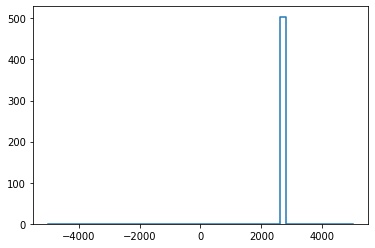

In [64]:
z_OFFM2= Hist(
    hist.axis.Regular(50, -5000, 5000, name="X", label="x [cm]", flow=False),)
z_OFFM2.fill(ak.to_numpy(ak.flatten(hit_z_offm2_trk/10)))
z_OFFM2.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb0f05405e0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb0f0540730>)

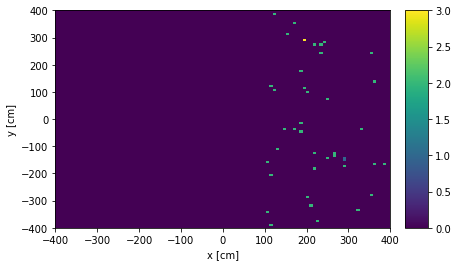

In [65]:
h_offm2 = Hist(
    hist.axis.Regular(100, -400, 400, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(100, -400, 400, name="Y", label="y [cm]", flow=False),
)

h_offm2.fill(ak.to_numpy(ak.flatten(hit_x_offm2_trk/1)),
       ak.to_numpy(ak.flatten(hit_y_offm2_trk/1)))
h_offm2.plot()

In [51]:
for i in trk_id:
    for j in i:
        if j[:len('ffi_ZDC')]=='ffi_ZDC':
            print(j)

NameError: name 'trk_id' is not defined

In [84]:
hit_z_prot_trk=hit_z.mask[hit_vol[:,:,:len('ffi_PROT_D2')]=='ffi_PROT_D2']
hit_x_prot_trk=hit_x.mask[hit_vol[:,:,:len('ffi_PROT_D2')]=='ffi_PROT_D2']
hit_y_prot_trk=hit_y.mask[hit_vol[:,:,:len('ffi_PROT_D2')]=='ffi_PROT_D2']

[StepArtists(step=<matplotlib.lines.Line2D object at 0x7fb0a5ace7f0>, errorbar=None, legend_artist=None)]

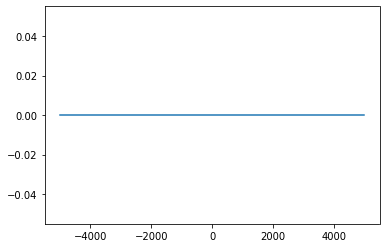

In [85]:
z_OFFM2= Hist(
    hist.axis.Regular(50, -5000, 5000, name="X", label="x [cm]", flow=False),)
z_OFFM2.fill(ak.to_numpy(ak.flatten(hit_z_prot_trk/10)))
z_OFFM2.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fb0a5aa9040>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fb0a5aa93d0>)

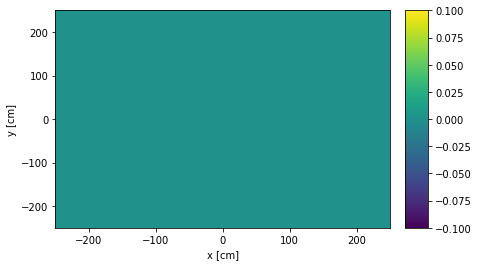

In [86]:
h_offm2 = Hist(
    hist.axis.Regular(100, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(100, -250, 250, name="Y", label="y [cm]", flow=False),
)

h_offm2.fill(ak.to_numpy(ak.flatten(hit_x_prot_trk/1)),
       ak.to_numpy(ak.flatten(hit_y_prot_trk/1)))
h_offm2.plot()